In [6]:
# Implementing Feedforward Neural Networks with Keras and TensorFlow for classification of the hand-written MNIST dataset using the following steps:

# a. Import the necessary packages
# b. Load the training and testing data
# c. Define the network architecture using Keras
# d. Train the model using SGD with 11 epochs
# e. Evaluate the network
# f. Plot the training loss and accuracy

In [1]:
# a. Import necessary packages
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# b
train = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

X_train = train.drop('label', axis=1).values
y_train = train['label'].values

X_test = test.drop('label', axis=1).values
y_test = test['label'].values

# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# c. Define the network architecture using Keras
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(3072,)),  # <-- updated
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
# d. Compile and train
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=11, batch_size=128, validation_split=0.1)

Epoch 1/11
352/352 [==============================] - 4s 10ms/step - loss: 1.9871 - accuracy: 0.2901 - val_loss: 1.8706 - val_accuracy: 0.3500
Epoch 2/11
352/352 [==============================] - 3s 10ms/step - loss: 1.8145 - accuracy: 0.3636 - val_loss: 1.7931 - val_accuracy: 0.3670
Epoch 3/11
352/352 [==============================] - 3s 9ms/step - loss: 1.7468 - accuracy: 0.3868 - val_loss: 1.7704 - val_accuracy: 0.3704
Epoch 4/11
352/352 [==============================] - 3s 9ms/step - loss: 1.6969 - accuracy: 0.4083 - val_loss: 1.7159 - val_accuracy: 0.3920
Epoch 5/11
352/352 [==============================] - 3s 8ms/step - loss: 1.6593 - accuracy: 0.4197 - val_loss: 1.6803 - val_accuracy: 0.4154
Epoch 6/11
352/352 [==============================] - 3s 9ms/step - loss: 1.6281 - accuracy: 0.4289 - val_loss: 1.6497 - val_accuracy: 0.4228
Epoch 7/11
352/352 [==============================] - 3s 9ms/step - loss: 1.5982 - accuracy: 0.4430 - val_loss: 1.6416 - val_accuracy: 0.4198
Epoc

In [8]:
# e. Evaluate the network
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 1.5509 - accuracy: 0.4569

Test Accuracy: 0.4569


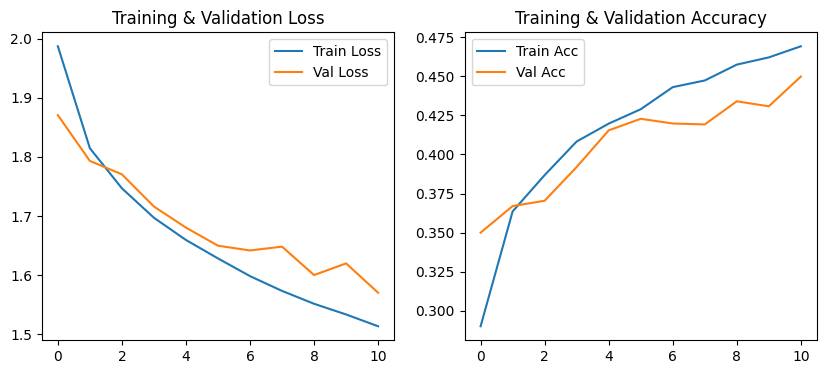

In [9]:
# f. Plot training loss and accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()